<a href="https://colab.research.google.com/github/nandinib1999/edureka-assignments/blob/main/Mid_Course_Test_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 1 
Classifying the radio signals from deep space using Keras from the SETI Dataset

In [1]:
!unzip "/content/drive/MyDrive/dataset.zip"

Archive:  /content/drive/MyDrive/dataset.zip
mapname:  conversion of  failed
   creating: valid/
   creating: train/
 extracting: train/images.csv        
 extracting: train/labels.csv        
 extracting: valid/images (1).csv    
 extracting: valid/labels (1).csv    


### Load & process data

In [2]:
import pandas as pd

train_images = pd.read_csv("/content/train/images.csv", header=None)
train_labels = pd.read_csv("/content/train/labels.csv", header=None)

valid_images = pd.read_csv("/content/valid/images (1).csv", header=None)
valid_labels = pd.read_csv("/content/valid/labels (1).csv", header=None)

In [3]:
print("There are", train_images.shape[0], "training images")
print("There are", valid_images.shape[0], "validation images")

There are 3200 training images
There are 800 validation images


In [4]:
train_images.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,8152,8153,8154,8155,8156,8157,8158,8159,8160,8161,8162,8163,8164,8165,8166,8167,8168,8169,8170,8171,8172,8173,8174,8175,8176,8177,8178,8179,8180,8181,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
0,0.631373,0.623529,0.713726,0.705882,0.658824,0.666667,0.654902,0.635294,0.647059,0.705882,0.729412,0.725490,0.619608,0.674510,0.643137,0.705882,0.713726,0.658824,0.615686,0.690196,0.654902,0.525490,0.556863,0.541176,0.482353,0.588235,0.615686,0.600000,0.603922,0.627451,0.678431,0.658824,0.698039,0.576471,0.678431,0.686275,0.690196,0.705882,0.705882,0.643137,...,0.650980,0.666667,0.666667,0.709804,0.682353,0.682353,0.682353,0.658824,0.682353,0.643137,0.627451,0.623529,0.650980,0.721569,0.627451,0.635294,0.709804,0.690196,0.678431,0.647059,0.658824,0.682353,0.654902,0.694118,0.741176,0.678431,0.662745,0.729412,0.694118,0.647059,0.682353,0.611765,0.650980,0.658824,0.600000,0.603922,0.654902,0.694118,0.658824,0.666667
1,0.725490,0.752941,0.749020,0.701961,0.690196,0.721569,0.709804,0.745098,0.654902,0.721569,0.678431,0.709804,0.713726,0.686275,0.717647,0.713726,0.694118,0.690196,0.721569,0.701961,0.698039,0.713726,0.705882,0.756863,0.756863,0.694118,0.650980,0.674510,0.752941,0.725490,0.725490,0.760784,0.678431,0.717647,0.725490,0.682353,0.709804,0.729412,0.721569,0.717647,...,0.686275,0.670588,0.713726,0.733333,0.725490,0.694118,0.694118,0.686275,0.674510,0.729412,0.721569,0.701961,0.682353,0.709804,0.756863,0.698039,0.729412,0.721569,0.674510,0.698039,0.725490,0.733333,0.666667,0.682353,0.701961,0.737255,0.745098,0.725490,0.698039,0.650980,0.721569,0.698039,0.721569,0.686275,0.713726,0.682353,0.690196,0.698039,0.701961,0.725490
2,0.717647,0.701961,0.713726,0.733333,0.705882,0.717647,0.725490,0.682353,0.717647,0.674510,0.690196,0.670588,0.662745,0.666667,0.713726,0.701961,0.721569,0.713726,0.662745,0.698039,0.682353,0.639216,0.717647,0.658824,0.674510,0.639216,0.643137,0.635294,0.654902,0.682353,0.639216,0.733333,0.690196,0.658824,0.686275,0.658824,0.690196,0.698039,0.709804,0.650980,...,0.533333,0.572549,0.537255,0.549020,0.670588,0.690196,0.670588,0.643137,0.662745,0.713726,0.717647,0.721569,0.709804,0.674510,0.709804,0.686275,0.658824,0.694118,0.698039,0.694118,0.678431,0.678431,0.690196,0.662745,0.650980,0.650980,0.686275,0.631373,0.666667,0.701961,0.709804,0.694118,0.705882,0.682353,0.639216,0.713726,0.670588,0.678431,0.737255,0.674510
3,0.705882,0.674510,0.654902,0.678431,0.666667,0.662745,0.678431,0.662745,0.686275,0.686275,0.631373,0.650980,0.670588,0.737255,0.674510,0.615686,0.670588,0.705882,0.686275,0.678431,0.694118,0.647059,0.662745,0.682353,0.654902,0.721569,0.709804,0.631373,0.670588,0.674510,0.701961,0.725490,0.666667,0.647059,0.733333,0.682353,0.678431,0.603922,0.666667,0.713726,...,0.670588,0.705882,0.749020,0.662745,0.564706,0.623529,0.674510,0.709804,0.658824,0.631373,0.705882,0.670588,0.658824,0.690196,0.674510,0.658824,0.635294,0.682353,0.682353,0.639216,0.666667,0.654902,0.647059,0.670588,0.682353,0.639216,0.705882,0.729412,0.674510,0.666667,0.639216,0.662745,0.631373,0.643137,0.705882,0.662745,0.705882,0.666667,0.654902,0.631373
4,0.647059,0.729412,0.701961,0.674510,0.611765,0.698039,0.713726,0.662745,0.701961,0.674510,0.631373,0.709804,0.694118,0.698039,0.666667,0.690196,0.690196,0.682353,0.682353,0.647059,0.678431,0.658824,0.760784,0.729412,0.674510,0.694118,0.698039,0.713726,0.690196,0.698039,0.686275,0.705882,0.662745,0.670588,0.705882,0.682353,0.690196,0.733333,0.709804,0.701961,...,0.639216,0.690196,0.662745,0.658824,0.662745,0.698039,0.603922,0.690196,0.627451,0.627451,0.654902,0.725490,0.650980,0.717647,0.666667,0.709804,0.682353,0.674510,0.721569,0.741176,0.635294,0.615686,0.674510,0.690196,0.658824,0.694118,0.701961,0.670588,0.721569,0.780392,0.639216,0.670588,0.705882,0.674510,0.721569,0.694118,0.674510,0.705882,0.749020,0.729412


In [5]:
train_labels.head()

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [6]:
train_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Columns: 8192 entries, 0 to 8191
dtypes: float64(8192)
memory usage: 200.0 MB


In [7]:
train_images.isna().sum()

0       0
1       0
2       0
3       0
4       0
       ..
8187    0
8188    0
8189    0
8190    0
8191    0
Length: 8192, dtype: int64

In [8]:
import numpy as np

X_train = np.array(train_images.values).reshape(len(train_images), 64, 128, 1)
X_val = np.array(valid_images.values).reshape(len(valid_images), 64, 128, 1)
print(X_train.shape)
print(X_val.shape)

(3200, 64, 128, 1)
(800, 64, 128, 1)


In [9]:
y_train = np.array(train_labels.values)
y_val = np.array(valid_labels.values)
print(y_train.shape)
print(y_val.shape)

(3200, 4)
(800, 4)


In [10]:
labels = ["squiggle", "narrowband", "narrowbanddrd", "noise"]
labels_map = {i:label for i, label in enumerate(labels)}
labels_map

{0: 'squiggle', 1: 'narrowband', 2: 'narrowbanddrd', 3: 'noise'}

In [11]:
from collections import Counter
import random

train_labels = [labels_map[np.argmax(y_train[i])] for i in range(len(y_train))]
dict(Counter(train_labels))

{'narrowband': 800, 'narrowbanddrd': 800, 'noise': 800, 'squiggle': 800}

In [12]:
n = 5

In [13]:
narrow_band = [indx for indx, val in enumerate(train_labels) if val=="narrowband"]
sample_nb = random.sample(narrow_band, n)
sample_nb

[2757, 2873, 3002, 3089, 3165]

In [14]:
narrowbanddrd = [indx for indx, val in enumerate(train_labels) if val=="narrowbanddrd"]
sample_nbdrd = random.sample(narrowbanddrd, n)
sample_nbdrd

[1251, 911, 1186, 925, 928]

In [15]:
noise = [indx for indx, val in enumerate(train_labels) if val=="noise"]
sample_noise = random.sample(noise, n)
sample_noise

[1624, 1880, 2306, 2292, 1805]

In [16]:
squiggle = [indx for indx, val in enumerate(train_labels) if val=="squiggle"]
sample_squiggle = random.sample(squiggle, n)
sample_squiggle

[231, 561, 78, 167, 651]

In [17]:
from matplotlib import pyplot as plt
%matplotlib inline

def plot(X_train, y_train, indx_ls):
  for indx in indx_ls:
    plt.imshow(np.squeeze(X_train[indx]), interpolation='nearest')
    plt.title(labels_map[np.argmax(y_train[indx])])
    plt.xticks([])
    plt.yticks([])
    plt.show()

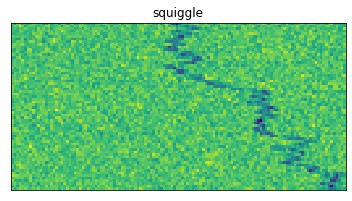

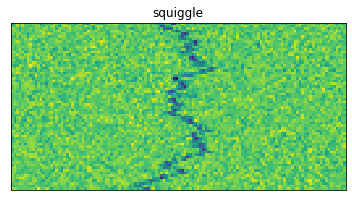

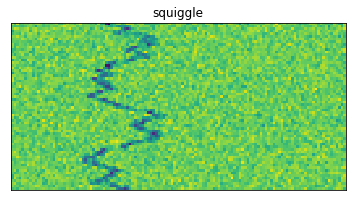

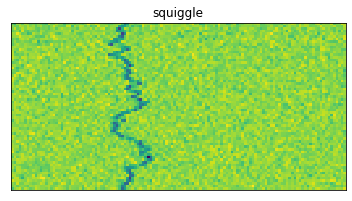

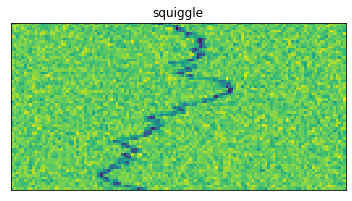

In [18]:
plot(X_train, y_train, sample_squiggle)

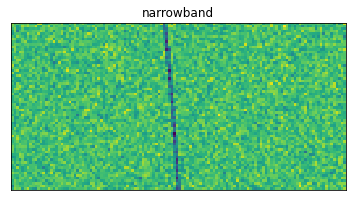

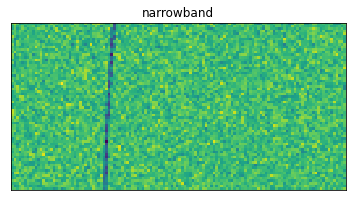

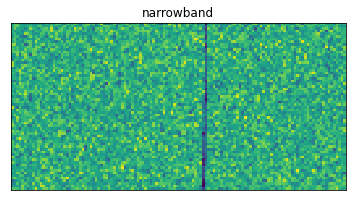

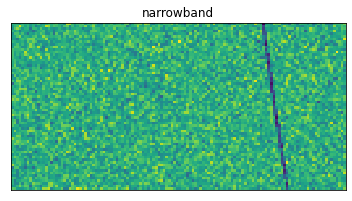

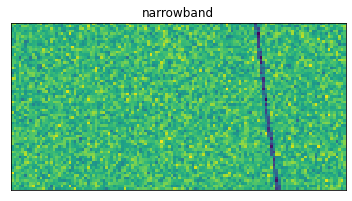

In [19]:
plot(X_train, y_train, sample_nb)

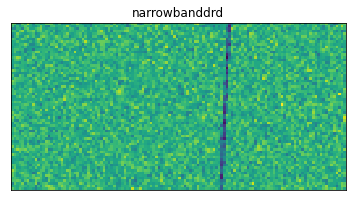

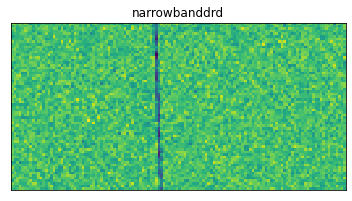

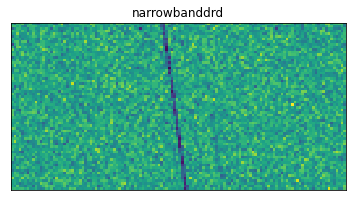

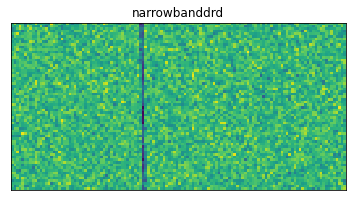

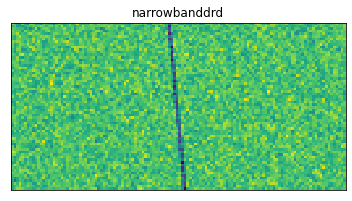

In [20]:
plot(X_train, y_train, sample_nbdrd)

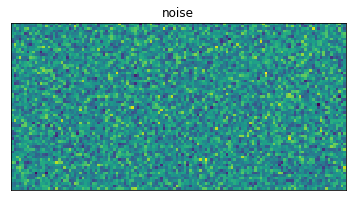

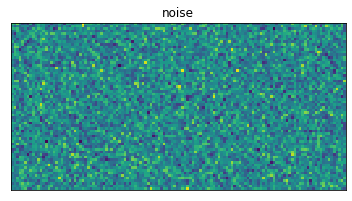

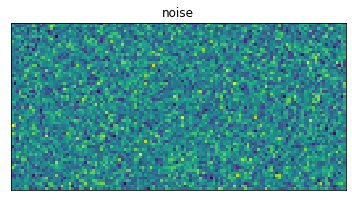

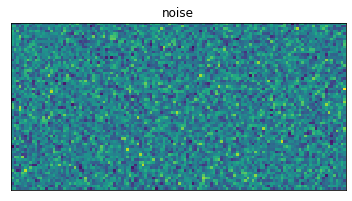

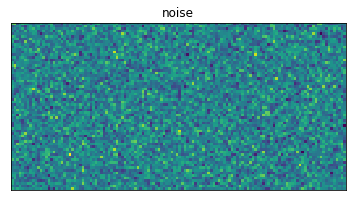

In [21]:
plot(X_train, y_train, sample_noise)

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(horizontal_flip = True, zoom_range=0.3, vertical_flip=True)
train_datagen.fit(X_train)

In [23]:
val_datagen = ImageDataGenerator(horizontal_flip = True, zoom_range=0.3, vertical_flip=True)
val_datagen.fit(X_val)

In [24]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [25]:
model = Sequential()

model.add(Conv2D(64 , (5 , 5) , padding = "same" , input_shape = (64 , 128 , 1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2 , 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(64 , (5 , 5) , padding = "same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2 , 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(128 , (5 , 5) , padding = "same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2 , 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.4))

model.add(Dense(4 , activation="softmax"))

In [26]:
initial_learning_rate = 0.005
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
                initial_learning_rate = initial_learning_rate,
                decay_steps = 5,
                decay_rate = 0.96,
                staircase = True
)
optimizers = Adam(learning_rate = lr_schedule)
model.compile(optimizer=optimizers, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 128, 64)       1664      
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 128, 64)       256       
_________________________________________________________________
activation (Activation)      (None, 64, 128, 64)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 64, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 64, 64)        102464    
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 64, 64)        2

In [27]:
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_loss',
                             save_weights_only=True, mode='min', verbose=0)
callbacks = [checkpoint]

batch_size = 32

history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=batch_size, shuffle=True),
    steps_per_epoch=len(X_train)//batch_size,
    validation_data = val_datagen.flow(X_val, y_val, batch_size=batch_size, shuffle=True),
    validation_steps = len(X_val)//batch_size,
    epochs=20,
    callbacks=callbacks)

Epoch 1/20
100/100 [==============================] - 230s 2s/step - loss: 0.7197 - accuracy: 0.6676 - val_loss: 2.8552 - val_accuracy: 0.2500
Epoch 2/20
100/100 [==============================] - 231s 2s/step - loss: 0.5482 - accuracy: 0.7013 - val_loss: 3.0560 - val_accuracy: 0.3137
Epoch 3/20
100/100 [==============================] - 226s 2s/step - loss: 0.5274 - accuracy: 0.7097 - val_loss: 4.3915 - val_accuracy: 0.2500
Epoch 4/20
100/100 [==============================] - 223s 2s/step - loss: 0.3850 - accuracy: 0.7560 - val_loss: 3.3279 - val_accuracy: 0.2937
Epoch 5/20
100/100 [==============================] - 228s 2s/step - loss: 0.3936 - accuracy: 0.7279 - val_loss: 2.2972 - val_accuracy: 0.5038
Epoch 6/20
100/100 [==============================] - 227s 2s/step - loss: 0.3812 - accuracy: 0.7341 - val_loss: 1.4173 - val_accuracy: 0.5225
Epoch 7/20
100/100 [==============================] - 223s 2s/step - loss: 0.3855 - accuracy: 0.7433 - val_loss: 0.6435 - val_accuracy: 0.6575

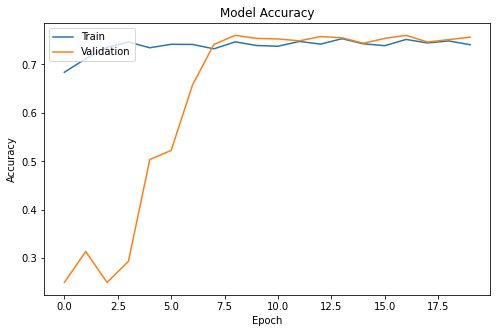

In [28]:
plt.figure(figsize=(8,5))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)
plt.show()

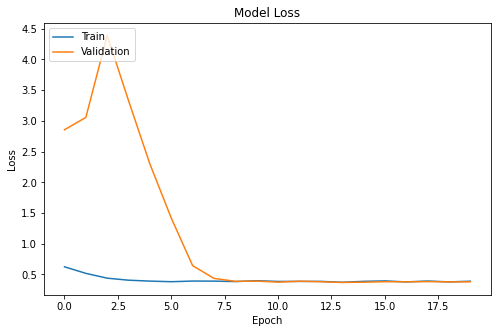

In [29]:
plt.figure(figsize=(8,5))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)
plt.show()

In [30]:
model.evaluate(X_val, y_val)

25/25 [==============================] - 12s 470ms/step - loss: 0.4378 - accuracy: 0.7325


[0.43779459595680237, 0.7325000166893005]

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns

y_true = np.argmax(y_val, 1)
y_pred = np.argmax(model.predict(X_val), 1)
print(metrics.classification_report(y_true, y_pred))
print("Classification accuracy: %0.6f" % metrics.accuracy_score(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       200
           1       0.50      0.62      0.56       200
           2       0.50      0.32      0.39       200
           3       1.00      0.99      1.00       200

    accuracy                           0.73       800
   macro avg       0.72      0.73      0.72       800
weighted avg       0.72      0.73      0.72       800

Classification accuracy: 0.732500
